In [1]:
import numpy as np
from math import sqrt
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt

I created a test data set using normal distributions with fairly dramatic mean changes at points 60 and 80.

In [2]:
data = np.loadtxt("CPTestData.csv")

In [3]:
# nice little class to store info on each group
class Group:
    def __init__ (self, b, values, dist = None):
        self.values = np.array(values)
        self.mean = self.values.mean()
        try:
            self.size = len(self.values)
        except:
            self.size = 1
        self.dist = dist
        self.boundary = b

In [4]:
#function to calculate distances between two groups
def CalcDist(group1, group2):
    s = 1
    if k < .2*m or m < 20:
        s = 1
    else:
        sse = 0
        for key in groups.keys():
            #calculate sum of squared error for each group
            sse += np.square(np.subtract(groups[key].values, groups[key].mean)).sum()
            
        s = sqrt((1/(m-.2*m-1))*(sse))
    return abs(group1.mean-group2.mean)/(s*sqrt((group1.size+group2.size)/(group1.size*group2.size)))      
            

In [5]:
# function to find min distance in a list of groups
def MinDist(groups):
    mini = 1e10
    key = None
    for key,group in tuple(groups.items())[:-1]:
        if  group.dist < mini:
                mini = group.dist
                loc = key
    return (loc, mini)

In [6]:
# declare variables
k = 1
m = len(data) - k
boundaries = [i for i in range(1,m+1)]
groups = {b-1: Group(b,d) for (b,d) in zip(boundaries, np.array(data))}
for key in list(groups.keys())[:-1]:
    groups[key].dist = CalcDist(groups[key],groups[key+1])
    
lstar = []
dstar = []
# for key, group in groups.items():
#     print(key,group.dist)
print("---------------------")

while (m-k)> 0:
    # Find Min Distance
    (loc,dist) = MinDist(groups)
    nextpos = groups[loc].boundary
    
    # Save changes
    lstar.insert(0,nextpos)
    dstar.insert(0,dist)
    
    print("Clustering at location: ", groups[loc].boundary)
    # Update cluster values
    groups[loc].values = np.append(groups[nextpos].values,groups[loc].values)
    groups[loc].mean = groups[loc].values.mean()
    groups[loc].size = len(groups[loc].values)
    groups[loc].boundary = groups[nextpos].boundary

    if nextpos != list(groups.keys())[-1]:
        nextpos2 = groups[nextpos].boundary
        groups[loc].dist = CalcDist(groups[loc],groups[nextpos2])

    else:
        groups[loc].dist = None
    
    # Remove old cluster
  
    groups.pop(nextpos)
#     boundaries = [groups[i].boundary for i in groups.keys()]
#     distances = [groups[i].dist for i in groups.keys()]
#     means = [groups[i].mean for i in groups.keys()]
#     sizes = means = [groups[i].size for i in groups.keys()]
#     print(list(zip(groups.keys(),boundaries,means,distances,sizes)))
#     print(list(zip(groups.keys(),distances)))
#     print("New clusters: ")
#     for key, group in groups.items():
#         print(key,group.dist)

    print("---------------------")
    k+=1

---------------------
Clustering at location:  24
---------------------
Clustering at location:  28
---------------------
Clustering at location:  13
---------------------
Clustering at location:  55
---------------------
Clustering at location:  69
---------------------
Clustering at location:  56
---------------------
Clustering at location:  115
---------------------
Clustering at location:  90
---------------------
Clustering at location:  72
---------------------
Clustering at location:  95
---------------------
Clustering at location:  5
---------------------
Clustering at location:  82
---------------------
Clustering at location:  103
---------------------
Clustering at location:  20
---------------------
Clustering at location:  112
---------------------
Clustering at location:  116
---------------------
Clustering at location:  117
---------------------
Clustering at location:  105
---------------------
Clustering at location:  52
---------------------
Clustering at location:

In [7]:
print(list(zip(lstar,dstar))[:5])

[(80, 9.73363796908731), (60, 15.30382701933526), (4, 5.9615908820988635), (66, 2.0620417704538485), (63, 5.087331946131527)]


### Plot of data

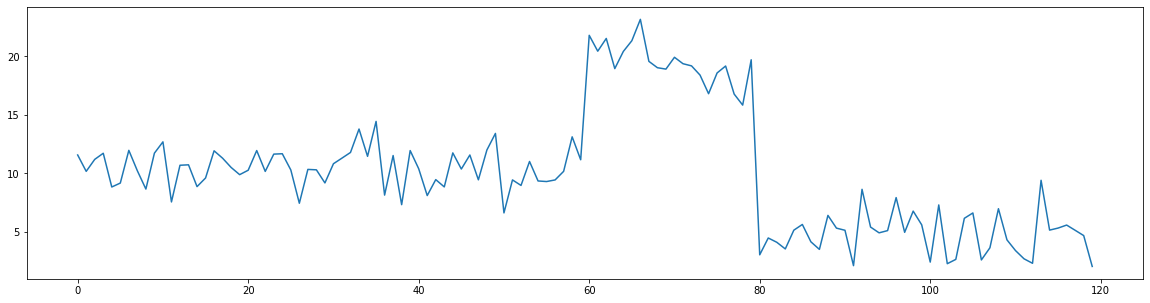

In [8]:
plt.figure(figsize = (20,5))
plt.plot(data)

### Plot of Distances

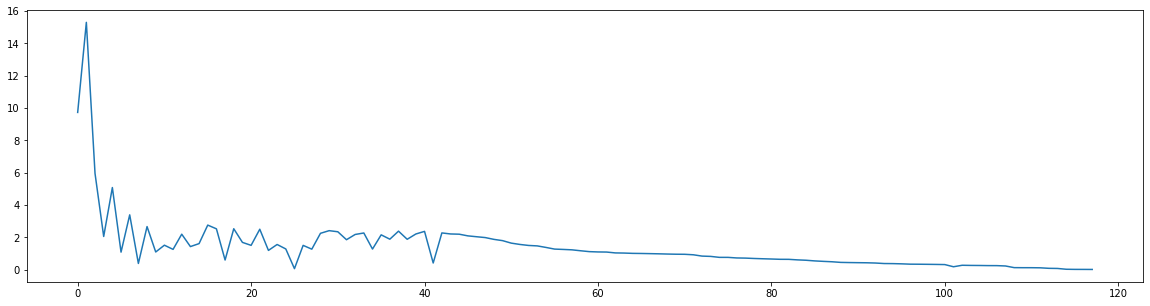

In [9]:
plt.figure(figsize = (20,5))
plt.plot(dstar)

### Plot of Data with Change Points

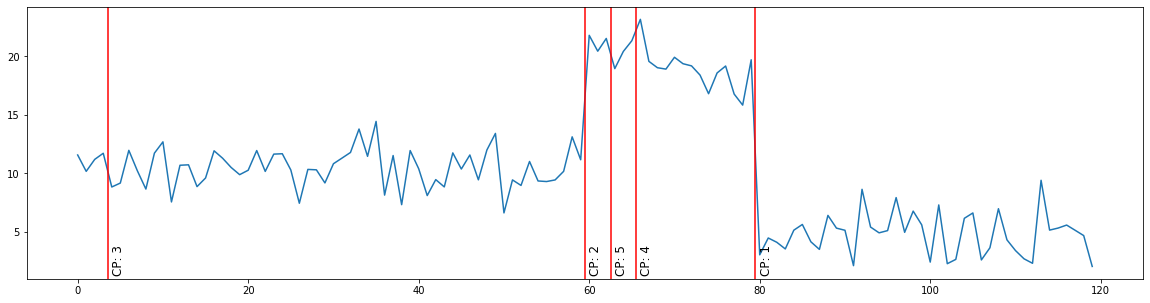

In [10]:
#Set the number of change points to plot
cps = 5

plt.figure(figsize = (20,5))
plt.plot(data)
for cp in range(0,cps):
    plt.axvline(x = lstar[cp]-.5, color = "r")
    plt.text(lstar[cp], 1.5,"CP: "+str(cp+1), size =12, rotation= 90)

The Minitab Macro cp2.mac was used to perform the same algorithm on the test data above

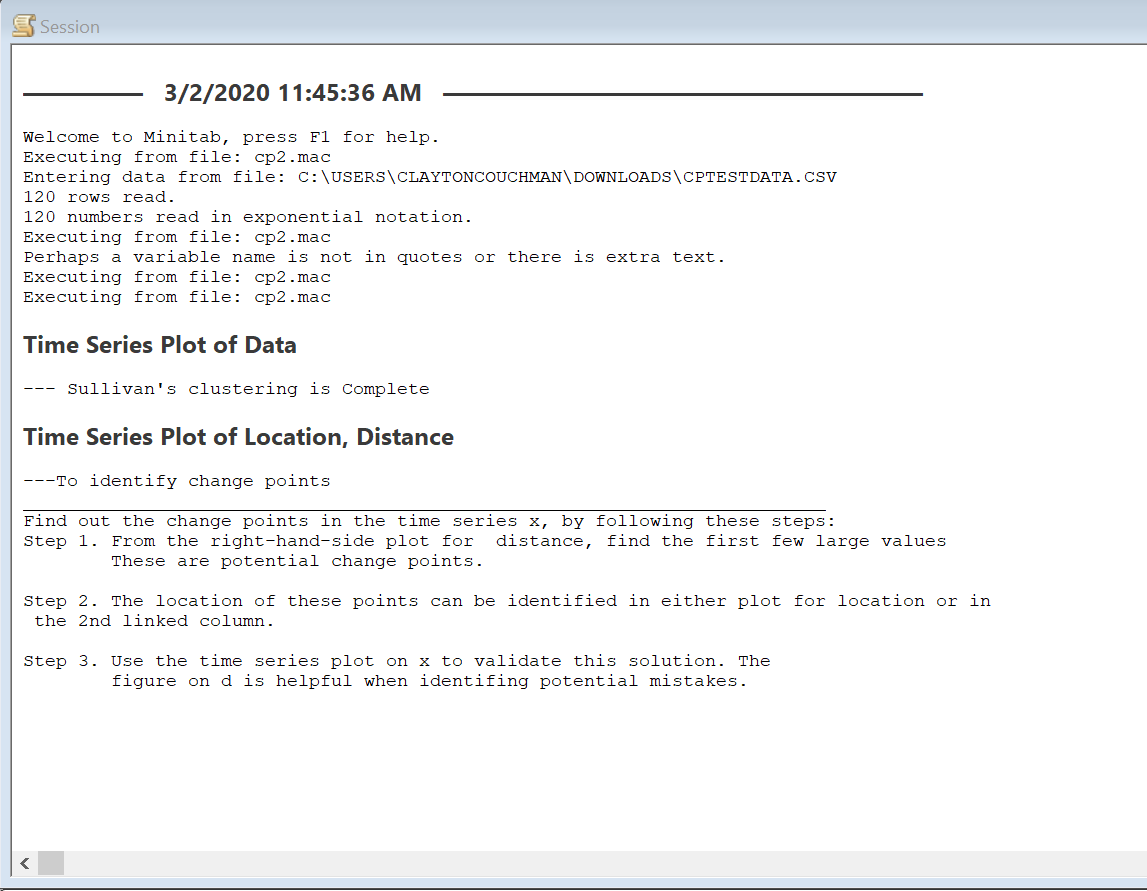

In [11]:
from IPython.display import Image
Image(filename='MinitabScreenshot.png')

In [12]:
minitabSol = pd.read_csv('MinitabSolution.csv')

In [13]:
# minitabSol = minitabSol.drop(columns = ['Data'])
minitabSol.head()

,Data,Location,Distance
0,11.575726,80.0,40.839431
1,10.176530,60.0,34.739494
2,11.200454,67.0,5.402754
3,11.723353,113.0,1.506761
4,8.839923,114.0,4.404324


Verify that data was the same

In [14]:
all(data.round(6) == np.array(minitabSol['Data']).round(6))

True

### Plot of Minitab Solution vs. Python Solution

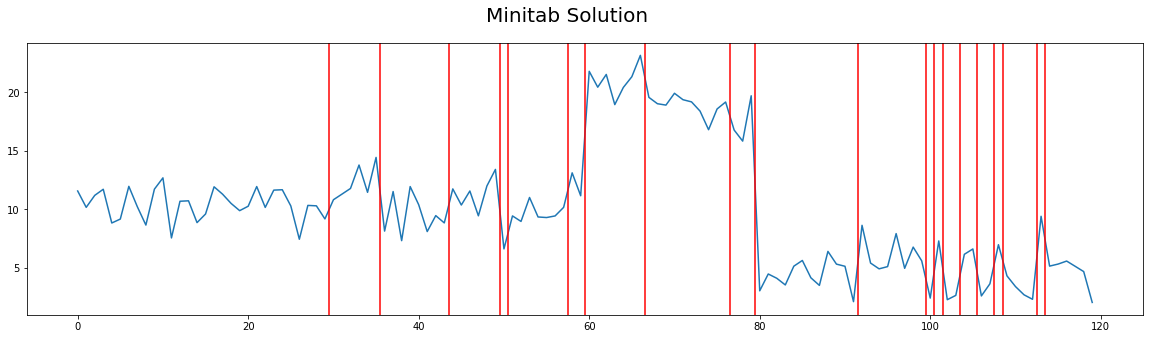

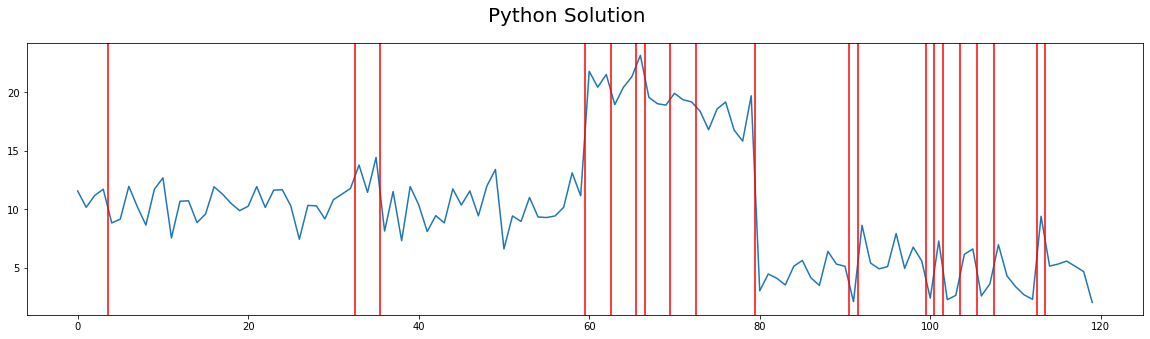

In [15]:
minitabSol[['Location','Distance']]

#Set the number of change points to plot
cps = 20

plt.figure(figsize = (20,5)).suptitle("Minitab Solution", size = 20)
plt.plot(minitabSol['Data'])
for cp in range(0,cps):
    plt.axvline(x = minitabSol.iloc[cp]['Location']-.5, color = "r")
#     plt.text(lstar[cp], 1.5,"CP: "+str(cp+1), size =12, rotation= 90)
    

plt.figure(figsize = (20,5)).suptitle('Python Solution', size = 20)
plt.plot(data)
for cp in range(0,cps):
    plt.axvline(x = lstar[cp]-.5, color = "r")
#     plt.text(lstar[cp], 1.5,"CP: "+str(cp+1), size =12, rotation= 90)

In [16]:
print(lstar[0:2])
print(minitabSol['Location'][0:2])

[80, 60]
0    80.0
1    60.0
Name: Location, dtype: float64


The algorithms returned similar, but not identical, solutions. I'm not too concerned by this as the actual change points (60 and 80) were the first two locations found by both algorithms. I also implemented the modified s value, which would explain some of the differences after the algorithm started using those values instead of s = 1.

In [17]:
list(zip(dstar, list(minitabSol['Distance'].drop(len(minitabSol)-1))))[-5:]

[(0.08412839835434885, 0.09241591),
 (0.03456279924065716, 0.08412839800000001),
 (0.026565601363943925, 0.034562799),
 (0.025253480280201187, 0.026565601),
 (0.02281008018010363, 0.02525348)]

In [18]:
list(zip(lstar, list(minitabSol['Location'].drop(len(minitabSol)-1))))[-5:]

[(69, 56.0), (55, 69.0), (13, 55.0), (28, 13.0), (24, 28.0)]

More concerning is that the first couple change points were different for each algorithm, as these were all with s = 1. However, it seems to be that the Python implementation simply chose a different starting change point and then made the same choices as Minitab. Again, I am not too concerned by this as Minitab and Python seem to handle the length of floats differently and likely broke near-ties in different orders. I double-checked the distance calculations in both methods and they seem to be identical.

In [19]:
data = np.loadtxt("test641data.txt")

In [20]:
df = pd.DataFrame(data)

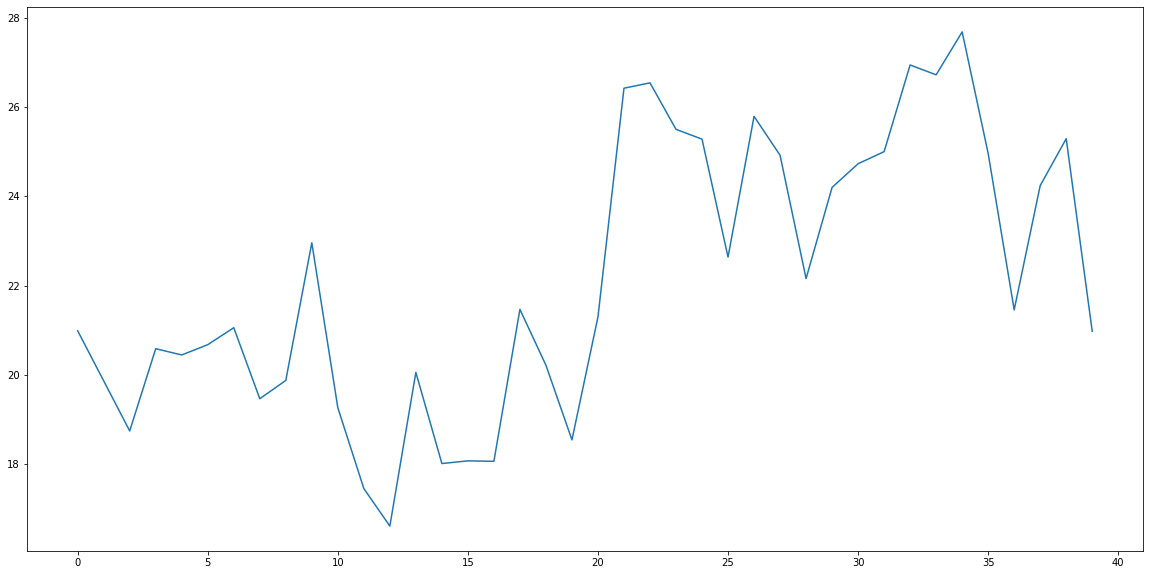

In [21]:
plt.figure(figsize = (20,10))
plt.plot(df);

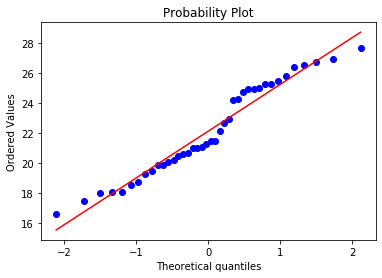

In [22]:
from scipy import stats
fig = stats.probplot(data, plot=plt)

There does seem to be a little variation from the line in the middle of the plot, but probably not enough to invalidate our normality assumption.

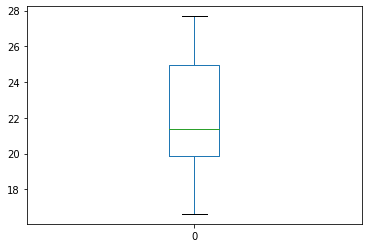

In [23]:
df.plot(kind = 'box');

There are not any obvious outliers

In [24]:
df.reset_index().corr()

,index,0
index,1.00000,0.65682
0,0.65682,1.00000


Again, there is a moderate correlation of the values with the index (time), but more testing would need to be done to determine whether it is statistically significant

In [25]:
# declare variables
k = 1
m = len(data) - k
boundaries = [i for i in range(1,m+1)]
groups = {b-1: Group(b,d) for (b,d) in zip(boundaries, np.array(data))}
for key in list(groups.keys())[:-1]:
    groups[key].dist = CalcDist(groups[key],groups[key+1])
    
lstar = []
dstar = []

print("---------------------")

while (m-k)> 0:
    # Find Min Distance
    (loc,dist) = MinDist(groups)
    nextpos = groups[loc].boundary
    
    # Save changes
    lstar.insert(0,nextpos)
    dstar.insert(0,dist)
    
    print("Clustering at location: ", groups[loc].boundary)
    
    # Update cluster values
    groups[loc].values = np.append(groups[nextpos].values,groups[loc].values)
    groups[loc].mean = groups[loc].values.mean()
    groups[loc].size = len(groups[loc].values)
    groups[loc].boundary = groups[nextpos].boundary

    if nextpos != list(groups.keys())[-1]:
        nextpos2 = groups[nextpos].boundary
        groups[loc].dist = CalcDist(groups[loc],groups[nextpos2])

    else:
        groups[loc].dist = None
    
    # Remove old cluster
  
    groups.pop(nextpos)

    print("---------------------")
    k+=1

---------------------
Clustering at location:  16
---------------------
Clustering at location:  15
---------------------
Clustering at location:  22
---------------------
Clustering at location:  4
---------------------
Clustering at location:  5
---------------------
Clustering at location:  24
---------------------
Clustering at location:  33
---------------------
Clustering at location:  31
---------------------
Clustering at location:  8
---------------------
Clustering at location:  30
---------------------
Clustering at location:  6
---------------------
Clustering at location:  12
---------------------
Clustering at location:  27
---------------------
Clustering at location:  34
---------------------
Clustering at location:  38
---------------------
Clustering at location:  1
---------------------
Clustering at location:  23
---------------------
Clustering at location:  18
---------------------
Clustering at location:  11
---------------------
Clustering at location:  3
------

### Plot of Distances

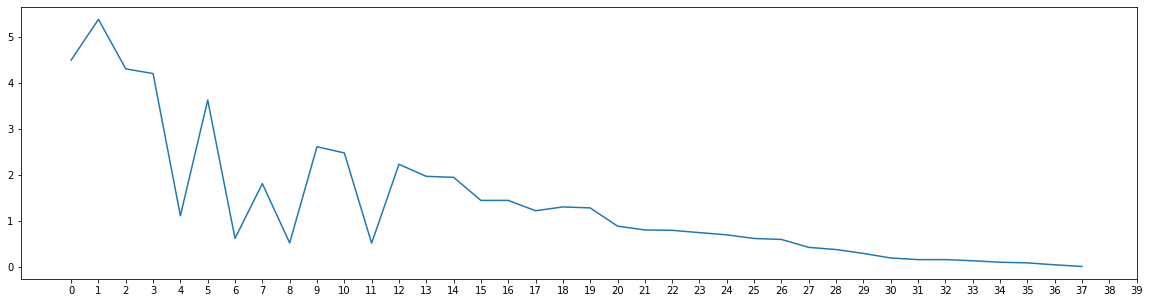

In [31]:
plt.figure(figsize = (20,5))
plt.plot(dstar)
plt.xticks(np.arange(0,len(df),1))
plt.show()

There seems to be a decent drop-off in distances after 3, so I chose that to plot in the next cell.

### Plot of Data with Change Points

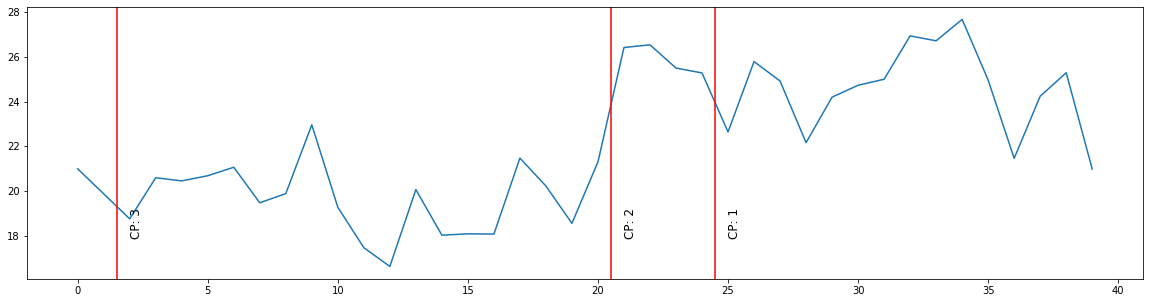

In [32]:
#Set the number of change points to plot
cps = 3

plt.figure(figsize = (20,5))
plt.plot(data)
for cp in range(0,cps):
    plt.axvline(x = lstar[cp]-.5, color = "r")
    plt.text(lstar[cp], 18,"CP: "+str(cp+1), size =12, rotation= 90)

I would look at the second change point as a possible mean shift location. 

In [35]:
print(lstar[1])

21
